In [1]:
# import relevant libraries to work in

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in CSV file
# got the dataset from https://www.kaggle.com/datasets/usmanlovescode/local-area-unemployment-statistics
df = pd.read_csv("/Users/tinashem/Documents/Datasets/Local_Area_Unemployment_Statistics__LAUS_.csv")

In [3]:
# check how many rows and columns are in the dataset
df.shape

(200631, 11)

In [4]:
# first glance of CSV file
df.head(10)

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
0,State,California,01/01/1976,1976,January,N,Final,9672362,8668016,1004346,0.104
1,State,California,01/01/1976,1976,January,Y,Final,9774280,8875685,898595,0.092
2,County,Los Angeles County,01/01/1976,1976,January,N,Final,3364151,3040058,324093,0.096
3,County,Los Angeles County,01/01/1976,1976,January,Y,Final,3381856,3081806,300050,0.089
4,Metropolitan Area,Los Angeles-Long Beach-Glendale MD,01/01/1976,1976,January,N,Final,3364151,3040058,324093,0.096
5,Metropolitan Area,Los Angeles-Long Beach-Glendale MD,01/01/1976,1976,January,Y,Final,3381856,3081806,300050,0.089
6,State,California,01/01/1977,1977,January,N,Final,10071966,9074522,997444,0.099
7,State,California,01/01/1977,1977,January,Y,Final,10137699,9204162,933537,0.092
8,County,Los Angeles County,01/01/1977,1977,January,N,Final,3418933,3107049,311884,0.091
9,County,Los Angeles County,01/01/1977,1977,January,Y,Final,3425617,3124784,300833,0.088


In [5]:
# display all the column names
df.columns

Index(['Area Type ', 'Area Name ', 'Date', 'Year ', 'Month',
       'Seasonally Adjusted (Y/N) ', 'Status (Preliminary / Final) ',
       'Labor Force', 'Employment ', 'Unemployment ', 'Unemployment Rate '],
      dtype='object')

In [6]:
# remove extra whitespace from column names and re-display columns

df.columns = df.columns.str.strip()
df.columns

Index(['Area Type', 'Area Name', 'Date', 'Year', 'Month',
       'Seasonally Adjusted (Y/N)', 'Status (Preliminary / Final)',
       'Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate'],
      dtype='object')

In [7]:
# let's make a new column for percentages to make our data analysis for unemployment rates easier

df.loc[:, 'Unemployment Rate %'] = df['Unemployment Rate']*100.0
df

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate,Unemployment Rate %
0,State,California,01/01/1976,1976,January,N,Final,9672362,8668016,1004346,0.104,10.4
1,State,California,01/01/1976,1976,January,Y,Final,9774280,8875685,898595,0.092,9.2
2,County,Los Angeles County,01/01/1976,1976,January,N,Final,3364151,3040058,324093,0.096,9.6
3,County,Los Angeles County,01/01/1976,1976,January,Y,Final,3381856,3081806,300050,0.089,8.9
4,Metropolitan Area,Los Angeles-Long Beach-Glendale MD,01/01/1976,1976,January,N,Final,3364151,3040058,324093,0.096,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...
200626,MSA,"Yuba City, CA MSA",02/01/2023,2023,February,Y,Final,79051,73856,5195,0.066,6.6
200627,MSA,"Yuba City, CA MSA",03/01/2023,2023,March,Y,Final,79310,73965,5345,0.067,6.7
200628,MSA,"Yuba City, CA MSA",04/01/2023,2023,April,Y,Final,79435,74013,5422,0.068,6.8
200629,MSA,"Yuba City, CA MSA",05/01/2023,2023,May,Y,Final,79594,73993,5601,0.070,7.0


In [8]:
# display the unique years in the dataset
df['Year'].unique()

array([1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023])

In [9]:
# display the different area types
df['Area Type'].unique()

array(['State', 'County', 'Metropolitan Area', 'Sub-County Place',
       'Metro Division', 'MSA'], dtype=object)

In [10]:
# check how many states are included in the dataset
states = df[df['Area Type'] == 'State'] 
states['Area Name'].unique()

array(['California'], dtype=object)

In [11]:
# display data types for each column
df.dtypes

Area Type                        object
Area Name                        object
Date                             object
Year                              int64
Month                            object
Seasonally Adjusted (Y/N)        object
Status (Preliminary / Final)     object
Labor Force                       int64
Employment                        int64
Unemployment                      int64
Unemployment Rate               float64
Unemployment Rate %             float64
dtype: object

In [12]:
# Let's see how many different counties we have

counties = df[df['Area Type'] == 'County'].groupby('Area Name')['Area Name'].unique()
print(counties)
print('Number of counties: ', counties.count())

Area Name
Alameda County                    [Alameda County]
Alpine County                      [Alpine County]
Amador County                      [Amador County]
Butte County                        [Butte County]
Calaveras County                [Calaveras County]
Colusa County                      [Colusa County]
Contra Costa County          [Contra Costa County]
Del Norte County                [Del Norte County]
El Dorado County                [El Dorado County]
Fresno County                      [Fresno County]
Glenn County                        [Glenn County]
Humboldt County                  [Humboldt County]
Imperial County                  [Imperial County]
Inyo County                          [Inyo County]
Kern County                          [Kern County]
Kings County                        [Kings County]
Lake County                          [Lake County]
Lassen County                      [Lassen County]
Los Angeles County            [Los Angeles County]
Madera County        

In [13]:
# seasonal adjustment is important for removing variables that might affect employment rates
# variables include changes in weather, school schedules, a global pandemic
# https://www.bls.gov/cps/seasfaq.htm
# we will investigate this further at another time and in possibly another project
# common practice is to use seasonally adjusted rates for monthly trends and changes over long periods of time
# let's filter these out

seasonally_adjusted_df = df[(df['Seasonally Adjusted (Y/N)'] == 'Y') & (df['Status (Preliminary / Final)'] == 'Final')]
seasonally_adjusted_df

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate,Unemployment Rate %
1,State,California,01/01/1976,1976,January,Y,Final,9774280,8875685,898595,0.092,9.2
3,County,Los Angeles County,01/01/1976,1976,January,Y,Final,3381856,3081806,300050,0.089,8.9
5,Metropolitan Area,Los Angeles-Long Beach-Glendale MD,01/01/1976,1976,January,Y,Final,3381856,3081806,300050,0.089,8.9
7,State,California,01/01/1977,1977,January,Y,Final,10137699,9204162,933537,0.092,9.2
9,County,Los Angeles County,01/01/1977,1977,January,Y,Final,3425617,3124784,300833,0.088,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...
200625,MSA,"Yuba City, CA MSA",01/01/2023,2023,January,Y,Final,78901,73790,5111,0.065,6.5
200626,MSA,"Yuba City, CA MSA",02/01/2023,2023,February,Y,Final,79051,73856,5195,0.066,6.6
200627,MSA,"Yuba City, CA MSA",03/01/2023,2023,March,Y,Final,79310,73965,5345,0.067,6.7
200628,MSA,"Yuba City, CA MSA",04/01/2023,2023,April,Y,Final,79435,74013,5422,0.068,6.8


In [14]:
# Looks like there are no county or state values for later years like 2023
# let's investigate

seasonally_adjusted_df.groupby(by=['Area Type', 'Year']).describe()

Labor Force                                           \
                     count          mean            std         min   
Area Type Year                                                        
County    1976        12.0  3.397156e+06   13461.235938   3381218.0   
          1977        12.0  3.466265e+06   24130.085395   3425617.0   
          1978        12.0  3.593778e+06   55508.465543   3510977.0   
          1979        12.0  3.668224e+06   25797.735692   3641395.0   
          1980        12.0  3.779621e+06   14896.875966   3746345.0   
...                    ...           ...            ...         ...   
State     2019        12.0  1.941508e+07   72559.619687  19354600.0   
          2020        12.0  1.896610e+07  362503.294029  18569200.0   
          2021        12.0  1.897712e+07  132128.086100  18730800.0   
          2022        11.0  1.923921e+07   26373.640422  19200000.0   
          2023         5.0  1.937214e+07   46557.792044  19316100.0   

                                                                 Employment  \
                        25%         50%          75%         max      count   
Area Type Year                                                                
County    1976   3384308.50   3397035.5   3406900.75   3419226.0       12.0   
          1977   3449612.75   3468894.0   3484177.75   3501463.0       12.0   
          1978   3548231.25   3596729.5   3639312.50   3670324.0       12.0   
          1979   3650651.25   3663922.5   3675103.50   3725963.0       12.0   
          1980   3772318.75   3783438.5   3791304.00   3795024.0       12.0   
...                     ...         ...          ...         ...        ...   
State     2019  19363775.00  19377250.0  19451000.00  19565600.0       12.0   
          2020  18684225.00  18839450.0  19134850.00  19600700.0       12.0   
          2021  18906550.00  19042100.0  19064650.00  19143700.0       12.0   
          2022  19216000.00  19240800.0  19252900.00  19282100.0       11.0   
          2023  19338400.00  19371600.0  19404800.00  19429800.0        5.0   

                              ... Unemployment Rate         \
                        mean  ...               75%    max   
Area Type Year                ...                            
County    1976  3.097740e+06  ...           0.08900  0.089   
          1977  3.186709e+06  ...           0.08325  0.088   
          1978  3.349216e+06  ...           0.07325  0.075   
          1979  3.463494e+06  ...           0.05650  0.060   
          1980  3.532634e+06  ...           0.07000  0.071   
...                      ...  ...               ...    ...   
State     2019  1.862030e+07  ...           0.04200  0.043   
          2020  1.704183e+07  ...           0.13350  0.161   
          2021  1.758798e+07  ...           0.08250  0.087   
          2022  1.843394e+07  ...           0.04250  0.052   
          2023  1.851868e+07  ...           0.04500  0.045   

               Unemployment Rate %                                         \
                             count       mean       std  min    25%   50%   
Area Type Year                                                              
County    1976                12.0   8.816667  0.093744  8.7  8.700  8.85   
          1977                12.0   8.050000  0.403395  7.5  7.775  7.95   
          1978                12.0   6.808333  0.538446  6.1  6.350  6.85   
          1979                12.0   5.583333  0.208167  5.4  5.400  5.50   
          1980                12.0   6.533333  0.597469  5.5  6.125  6.80   
...                            ...        ...       ...  ...    ...   ...   
State     2019                12.0   4.100000  0.120605  4.0  4.000  4.05   
          2020                12.0  10.200000  4.086786  4.3  8.200  9.65   
          2021                12.0   7.325000  1.106284  5.5  6.425  7.60   
          2022                11.0   4.190909  0.425334  3.8  3.950  4.10   
          2023                 5.0   4.4000

In [15]:
# let's investigate how many unique counties are in the seasonally adjusted dataset

seasonally_adjusted_df.groupby('Area Type')['Area Name'].unique()

Area Type
County                                            [Los Angeles County]
MSA                  [Bakersfield, CA MSA, Chico, CA MSA, El Centro...
Metro Division       [Anaheim-Santa Ana-Irvine, CA Met Div, Oakland...
Metropolitan Area                 [Los Angeles-Long Beach-Glendale MD]
State                                                     [California]
Name: Area Name, dtype: object

In [16]:
# we have only one county in the seasonally adjusted dataset which is Los Angeles County
# any EDA we do for counties will not be representative of all counties
# let's see how many values we have for each group and what we can use for our EDA

seasonally_adjusted_df.groupby('Area Type').nunique()

,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate,Unemployment Rate %
Area Type,,,,,,,,,,,
County,1,568,48,12,1,1,550,560,536,89,89
MSA,26,401,34,12,1,1,10216,10214,9297,268,268
Metro Division,4,401,34,12,1,1,1598,1594,1582,107,107
Metropolitan Area,1,568,48,12,1,1,550,560,536,89,89
State,1,568,48,12,1,1,566,566,562,92,92


In [17]:
# MSA means Metropolitan Statistical Areas
# https://www.bls.gov/lau/lauov.htm#:~:text=The%20Local%20Area%20Unemployment%20Statistics,England%20City%20and%20Town%20Areas)

# We can see that we have 34 unique years for MSA data
# let's take a deeper look into why we have 34 years versus the 48 that the other area types have

seasonally_adjusted_df.groupby('Area Type')['Year'].max()

Area Type
County               2023
MSA                  2023
Metro Division       2023
Metropolitan Area    2023
State                2023
Name: Year, dtype: int64

In [18]:
# another look at the MSA data

seasonally_adjusted_df.groupby('Area Type')['Year'].min()

Area Type
County               1976
MSA                  1990
Metro Division       1990
Metropolitan Area    1976
State                1976
Name: Year, dtype: int64

In [19]:
# We can see that MSA data only begins from 1990, so we will need to keep that in mind when
# looking at our EDA
seasonally_adjusted_df.groupby('Area Type')['Year'].value_counts().sort_values()

Area Type          Year
State              2023      5
Metropolitan Area  2023      5
County             2023      5
Metropolitan Area  2022     11
County             2022     11
                          ... 
MSA                2005    312
                   2006    312
                   2022    312
                   1993    312
                   2014    312
Name: count, Length: 212, dtype: int64

<Axes: xlabel='Year', ylabel='Unemployment Rate'>

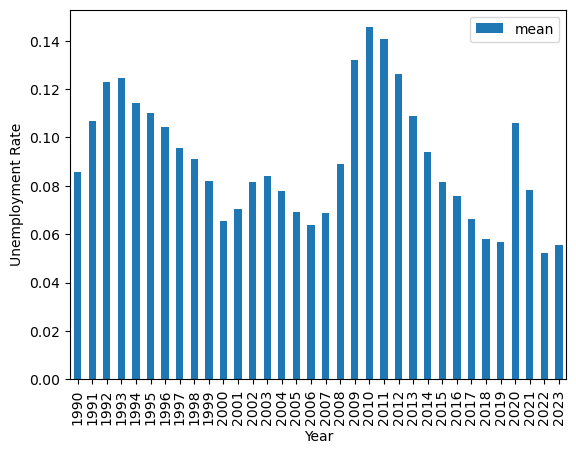

In [20]:
# let's plot the unemployment rates for the 26 MSAs

states[states['Seasonally Adjusted (Y/N)'] == 'Y'].sort_values(by=['Year', 'Date'])
msa = seasonally_adjusted_df[seasonally_adjusted_df['Area Type'] == 'MSA'].groupby('Year')
msa_mean = msa['Unemployment Rate'].agg(['mean'])
msa_mean.plot(kind='bar', xlabel='Year', ylabel='Unemployment Rate')

<Axes: xlabel='Year', ylabel='Unemployment Rate'>

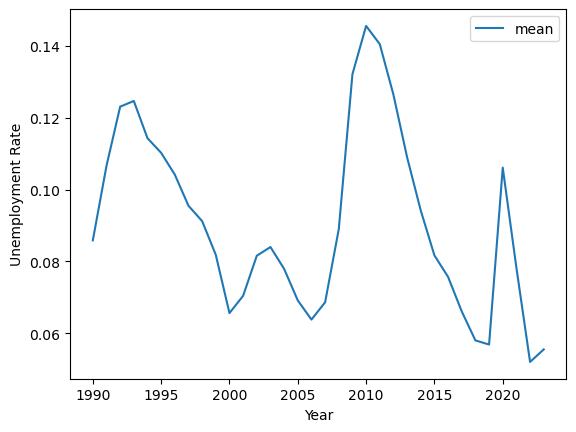

In [21]:
# let's make it a line plot to see how much neater it will be

msa_mean.plot(xlabel='Year', ylabel='Unemployment Rate')

In [22]:
# let's examine the names of each of the data points we will be observing next

seasonally_adjusted_df.groupby('Area Type')['Area Name'].describe()

,count,unique,top,freq
Area Type,,,,
County,568,1,Los Angeles County,568
MSA,10426,26,"Bakersfield, CA MSA",401
Metro Division,1604,4,"Anaheim-Santa Ana-Irvine, CA Met Div",401
Metropolitan Area,568,1,Los Angeles-Long Beach-Glendale MD,568
State,568,1,California,568


<Axes: title={'center': 'Los Angeles County Unemployment Rate changes'}, xlabel='Year'>

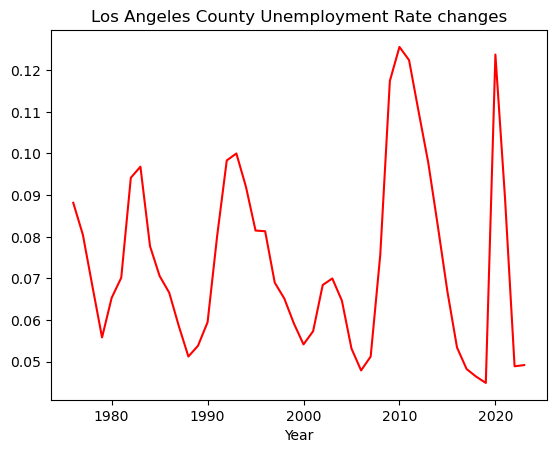

In [23]:
# let's use a plot to see how the unemployment rate changed in Los Angeles County from 1976 to 2023

unique_county = seasonally_adjusted_df[seasonally_adjusted_df['Area Type'] == 'County'].groupby('Year')
unique_county_mean = unique_county['Unemployment Rate'].agg('mean')
unique_county_mean.plot(title='Los Angeles County Unemployment Rate changes', kind='line', color='red')

<Axes: title={'center': 'California Labor Force Size'}, xlabel='Year'>

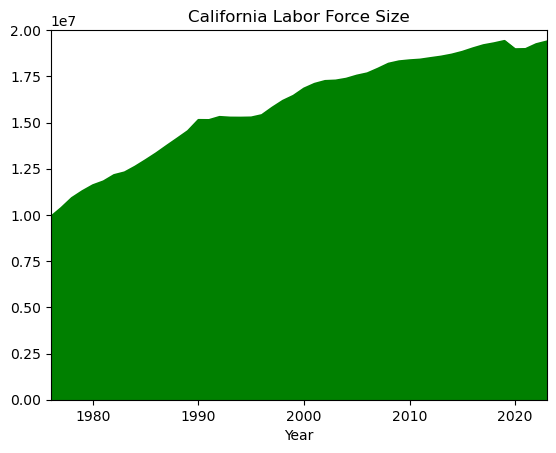

In [24]:
# plot an area graph showing change in California's labor force size

states_adjusted = states[states['Seasonally Adjusted (Y/N)'] == 'Y']
states_adjusted.groupby('Year')['Labor Force'].agg('mean').plot(kind='area', xlim=[1976,2023], ylim=[0,20000000], color='green', title='California Labor Force Size')

In [25]:
states_adjusted

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate,Unemployment Rate %
1,State,California,01/01/1976,1976,January,Y,Final,9774280,8875685,898595,0.092,9.2
7,State,California,01/01/1977,1977,January,Y,Final,10137699,9204162,933537,0.092,9.2
13,State,California,01/01/1978,1978,January,Y,Final,10673813,9864666,809147,0.076,7.6
19,State,California,01/01/1979,1979,January,Y,Final,11141282,10414825,726457,0.065,6.5
25,State,California,01/01/1980,1980,January,Y,Final,11497843,10787840,710003,0.062,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...
182437,State,California,12/01/2017,2017,December,Y,Final,19189000,18331900,857100,0.045,4.5
183460,State,California,12/01/2018,2018,December,Y,Final,19358500,18516900,841600,0.043,4.3
184483,State,California,12/01/2019,2019,December,Y,Final,19565600,18751200,814400,0.042,4.2
185506,State,California,12/01/2020,2020,December,Y,Final,18735500,17039900,1695600,0.091,9.1


<Axes: title={'center': 'Yearly Median Unemployment Rate'}, xlabel='Year'>

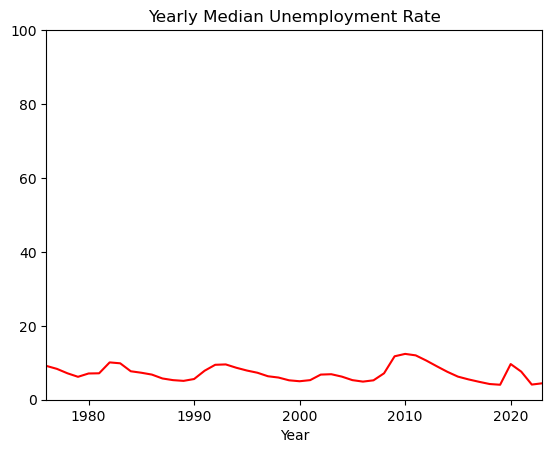

In [26]:
# 2010 was the highest unemployment rate in California across the years
states_adjusted.groupby('Year')['Unemployment Rate %'].agg('median').plot(kind='line',  xlim=[1976,2023], ylim=[0,100], color='red', title='Yearly Median Unemployment Rate')

/Users/tinashem/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tinashem/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tinashem/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Year', ylabel='Unemployment Rate %'>

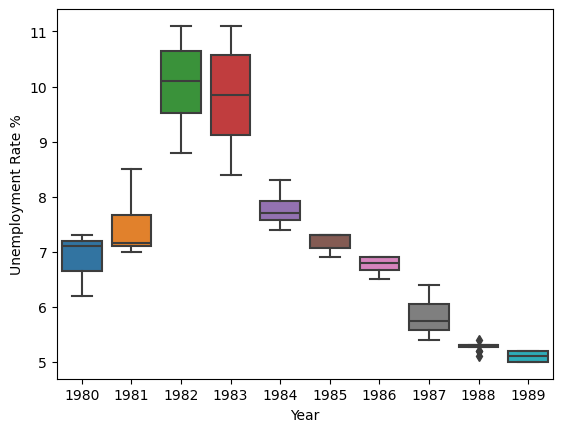

In [27]:
# let's investigate the trend in unemployment rates for the state of California
# let's do it by year
# I want to see how the median value for unemployment rate % changes across each decade

# plot the data using seaborn
seaborn_data_1 = states_adjusted[states_adjusted['Year'].isin(list(range(1976,1980,1)))]
seaborn_data_2 = states_adjusted[states_adjusted['Year'].isin(list(range(1980,1990,1)))]
seaborn_data_3 = states_adjusted[states_adjusted['Year'].isin(list(range(1990,2000,1)))]
seaborn_data_4 = states_adjusted[states_adjusted['Year'].isin(list(range(2000,2010,1)))]
seaborn_data_5 = states_adjusted[states_adjusted['Year'].isin(list(range(2010,2020,1)))]
seaborn_data_6 = states_adjusted[states_adjusted['Year'].isin(list(range(2020,2024,1)))]

# sns.boxplot(x='Year', y='Unemployment Rate %', data=seaborn_data_1)
sns.boxplot(x='Year', y='Unemployment Rate %', data=seaborn_data_2)
# sns.boxplot(x='Year', y='Unemployment Rate %', data=seaborn_data_3)
# sns.boxplot(x='Year', y='Unemployment Rate %', data=seaborn_data_4)
# sns.boxplot(x='Year', y='Unemployment Rate %', data=seaborn_data_5)
# sns.boxplot(x='Year', y='Unemployment Rate %', data=seaborn_data_6)

In [28]:
### let's make a boxplot to see the unemployment rates for each year and find outliers

# First, I want to see which years had median unemployment rates that were uncharacteristically high or low
# I will do it from 2000 to 2010

In [29]:
''' 
Add a data validation column that adds up 'Employment' & 'Unemployment' and checks
if that value is equal to 'Labor Force' value
'''

" \nAdd a data validation column that adds up 'Employment' & 'Unemployment' and checks\nif that value is equal to 'Labor Force' value\n"

In [30]:
'''
I want to see which years had noticeable changes in the size of the labor force.
Visualize the percentage change in labor force from the year 1976-2023
'''

'\nI want to see which years had noticeable changes in the size of the labor force.\nVisualize the percentage change in labor force from the year 1976-2023\n'

In [31]:
'''
Which year had the largest percentage increase in labor force? Smallest?
'''

'\nWhich year had the largest percentage increase in labor force? Smallest?\n'

In [32]:
'''
What distribution do the labor force & unemployment rate numbers closely follow?
Define parameters for which time periods to look at.
'''

'\nWhat distribution do the labor force & unemployment rate numbers closely follow?\nDefine parameters for which time periods to look at.\n'

In [33]:
'''
Given that a random worker is selected from Los Angeles County, what is the probability that they are unemployed?
'''

'\nGiven that a random worker is selected from Los Angeles County, what is the probability that they are unemployed?\n'

In [34]:
'''
Which counties should receive the most attention for creation of employment opportunities?
What are the top 5 counties for unemployment rates?
'''

'\nWhich counties should receive the most attention for creation of employment opportunities?\nWhat are the top 5 counties for unemployment rates?\n'

In [35]:
'''
Per year, how does the unemployment rate vary? (Standard deviation)
'''

'\nPer year, how does the unemployment rate vary? (Standard deviation)\n'

In [36]:
'''
Compare differences in unemployment rates over selected periods of time.
For example, unemployment rate in selected counties affected by significant
historic periods like COVID
'''

'\nCompare differences in unemployment rates over selected periods of time.\nFor example, unemployment rate in selected counties affected by significant\nhistoric periods like COVID\n'

In [37]:
'''
End of analysis
'''

'\nEnd of analysis\n'